In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.getcwd()

'/content'

In [5]:
cd /content/drive/MyDrive/kitti_yolo_v8


/content/drive/MyDrive/kitti_yolo_v8


In [6]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [13]:
from ultralytics import YOLO
import os
from IPython.display import display,Image
from IPython import display
display.clear_output()
!yolo mode=check

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 771, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=check'. Valid modes are {'train', 'benchmark', 'val', 'track', 'export', 'predict'}.

    Arguments received: ['yolo', 'mode=check']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'classify', 'obb', 'detect', 'pose', 'segment'}
                MODE (required) is one of {'train', 'benchmark', 'val', 'track', 'export', 'predict'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with

In [9]:
!yolo task=detect mode=train model=yolov8m.pt data=data.yaml epochs=100 imgsz=640

Ultralytics YOLOv8.2.68 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

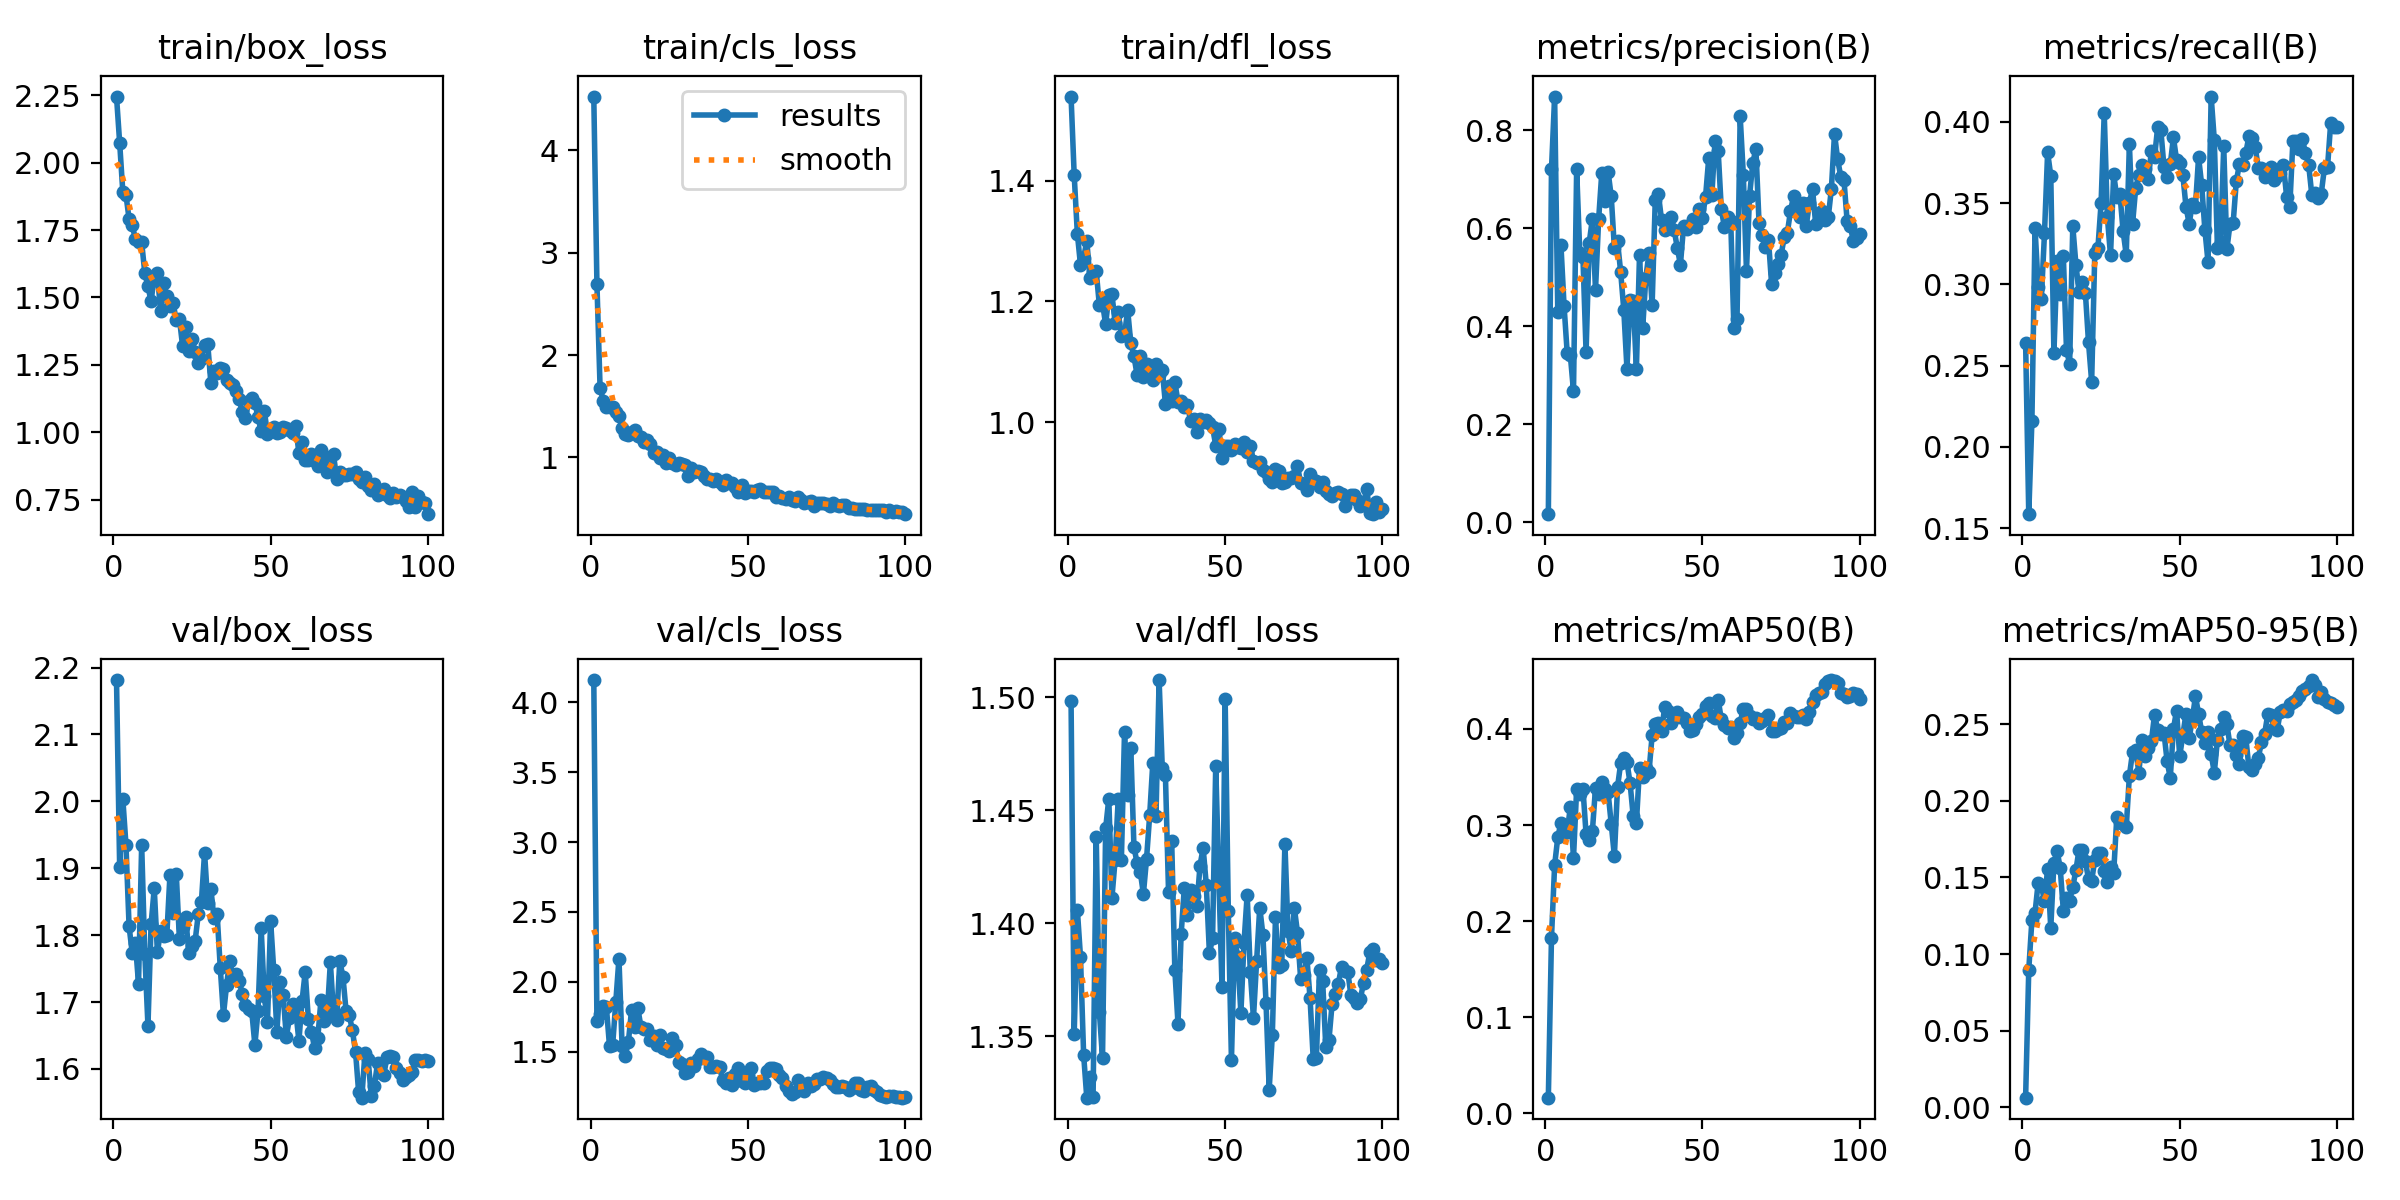

In [15]:
Image(filename=f"/content/drive/MyDrive/kitti_yolo_v8/runs/detect/train2/results.png",width=600)

In [16]:
!yolo task=detect mode=val model=/content/drive/MyDrive/kitti_yolo_v8/runs/detect/train2/weights/best.pt data=data.yaml


Ultralytics YOLOv8.2.68 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,844,971 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/kitti_yolo_v8/data/val/labels.cache... 101 images, 0 backgrounds, 3 corrupt: 100% 101/101 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/MyDrive/kitti_yolo_v8/data/val/images/007003.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0108]
val: WARNING ⚠️ /content/drive/MyDrive/kitti_yolo_v8/data/val/images/007049.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0012]
val: WARNING ⚠️ /content/drive/MyDrive/kitti_yolo_v8/data/val/images/007099.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0108]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:06<00:00,  1.02it/s]
                   all         98        639      0.793

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/kitti_yolo_v8/runs/detect/train2/weights/best.pt show=True conf=0.5 source=sample.mp4


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.2.68 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,844,971 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (frame 1/1800) /content/drive/MyDrive/kitti_yolo_v8/sample.mp4: 384x640 10 Cars, 1 Van, 91.2ms
video 1/1 (frame 2/1800) /content/drive/MyDrive/kitti_yolo_v8/sample.mp4: 384x640 10 Cars, 1 Van, 57.0ms
video 1/1 (frame 3/1800) /content/drive/MyDrive/kitti_yolo_v8/sample.mp4: 384x640 8 Cars, 1 Van, 25.2ms
video 1/1 (frame 4/1800) /content/drive/MyDrive/kitti_yolo_v8/sample.mp4: 384x640 9 Cars, 25.2ms
video 1/1 (frame 5/1800) /content/drive/MyDrive/kitti_yolo_v8/sample.mp4: 384x640 11 Cars, 25.2ms
video 1/1 (frame 6/1800) /content/drive/MyDrive/kitti_yolo_v8/sample.mp4: 384x640 12 Cars, 25.2ms
video 1/1 (frame 7/1800) /content/drive/MyDrive/kitti_yolo_v8/sample.mp4: 384x640 11 Cars, 25.2ms
video 1/1 (frame 8/1800) /content/drive/MyDrive/ki